# Assignment 4: Bayesian linear regression

Modify the example we developed in class to implement Bayesian linear regression with basis functions, i.e.,

$\Pr(y \mid x,w)=\mathcal{N}(y \mid wT\phi(x),\ \alpha−1I), \\ \Pr(w)=\mathcal{N}(w \mid 0,\beta−1I), \alpha=5,\beta=0.1$
.

## Problem 1:

Generate a set of N noisy observations by sampling $y(x)=e^xsin(2\pi x)+ \epsilon, \ \epsilon \sim \mathcal{N}(0,0.5), x \in [0,3]$, on a latin hypercube grid, and compute the MLE and MAP estimates for the weights $w$ using different types and numbers of features $\phi(x)$:

Identity basis: $\phi(x)=x$

Monomial basis: $\phi(x)={1,x,x^2,x^3,…,x^M}$

Fourier basis: $\phi(x)={0,1,sin(πx),cos(πx),sin(2πx),cos(2πx),…, sin(Mπx), cos(Mπx)}$ (this case has a total of $2M$ features)

Legendre basis: Can be computed using the built-in NumPy function.

### a) Build a class that contains the different types of features.

ANSWER: The class is in *features.py*.


### b) For the case $N=500$, $M=8$, plot the data, the mean predictions corresponding to the MLE and MAP estimates for w, and 500 samples from the predictive posterior distribution. Perform this experiment again for the monomial basis, but in this case use $N=50$, $M=17$. Make a qualitative comment on the accuracy of the prediction (Why the prediction looks like that?).

In [1]:
# /////////////////////////////////////////////
# /////////////////////////////////////////////
# /////////////////////////////////////////////
# N = 500, M = 8 (just using 1 given this has the choice of basis), identity basis

from models import BayesianLinearRegression
from features import BayesianLinearRegressionFeatures
import numpy as np
import math
import matplotlib.pyplot as plt
from pyDOE import lhs
from scipy.stats import norm
    
N = 500 # N is the number of training points.
M = 1   # M is the number of parameters (a.k.a the length of w)
alpha = 5.0
beta = 0.1
noise_var = 0.3

# Create random input and output data // will probably need to use a function for normal dist here
X = lhs(1, N)*3
epsilon = norm.pdf(X, scale=0.5)
y = np.exp(X) * np.sin(2 * np.pi * X) + epsilon

# Define models
blrf = BayesianLinearRegressionFeatures()
m = blrf.BuildIdentityFeaturedModel(X, y, M, (alpha, beta))
#     m = BayesianLinearRegression(X, y, alpha, beta)

# Fit MLE and MAP estimates for w
w_MLE = m.fit_MLE()
w_MAP, Lambda_inv = m.fit_MAP()

# Predict at a set of test points
X_star = np.linspace(0,3,N)[:, None] # our x_star points will depend on the phi(x) function
Phi_star = blrf.FormatX_star(X_star, M)

print("X_star shape: {}, w_MLE shape: {}".format(X_star.shape, w_MLE.shape))
y_pred_MLE = np.matmul(Phi_star, w_MLE)
y_pred_MAP = np.matmul(Phi_star, w_MAP)

# Draw sampes from the predictive posterior
num_samples = 10
mean_star, var_star = m.predictive_distribution(Phi_star)
samples = np.random.multivariate_normal(mean_star.flatten(), var_star, num_samples)

# Plot
plt.figure(1, figsize=(10,6))
plt.subplot(1,2,1)
for i in range(0, num_samples):
    plt.plot(X_star, samples[i,:], 'k', linewidth=0.25)
plt.plot(X, y, 'o', label = 'Data')
plt.plot(X_star, y_pred_MLE, linewidth=2.0, label='MLE')
plt.plot(X_star, y_pred_MAP, linewidth=2.0, label='MAP')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
#    plt.axis('tight')

X_star shape: (500, 1), w_MLE shape: (1, 1)


Text(0, 0.5, '$y$')

ANSWER: For $N=50$, $M=17$, the prediction accuracy is much improved from the identity model used & created previously. In this case, the MLE estimate is more accurate.

Note: the code snippet below warns that the variance matrix of the predictive posterior distribution is not positive semi-definite. Given that the model already includes jitter, this is an indication of poorness of fit --- the plot of the MLE shows this as well.

X shape: (200, 1), epsilon shape: (200, 1)
X_star shape: (200, 1), w_MLE shape: (12, 1)


C:\Users\pensi\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: covariance is not symmetric positive-semidefinite.


Text(0, 0.5, '$y$')

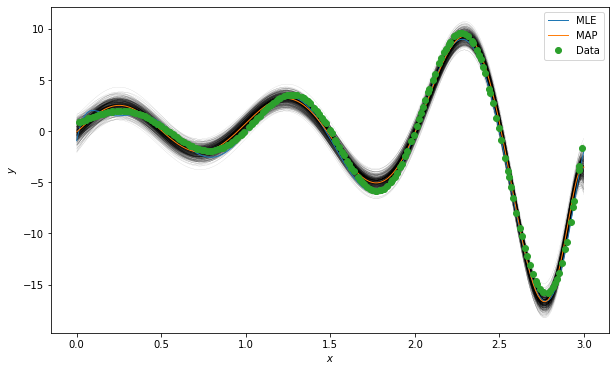

In [2]:
# /////////////////////////////////////////////
# /////////////////////////////////////////////
# /////////////////////////////////////////////
# N = 50, M = 17, monomial basis

N = 200 # N is the number of training points.
M = 11   # M is the number of parameters (a.k.a the length of w)
alpha = 5.0
beta = 0.1

# Create random input and output data // will probably need to use a function for normal dist here
X = lhs(1, N)*3
epsilon = norm.pdf(X, scale=0.5)
print("X shape: {}, epsilon shape: {}".format(X.shape, epsilon.shape))

y = np.exp(X) * np.sin(2 * np.pi * X) + epsilon

# Define models
blrf = BayesianLinearRegressionFeatures()
m = blrf.BuildLegendreFeaturedModel(X, y, M, (alpha, beta))

# Fit MLE and MAP estimates for w
w_MLE = m.fit_MLE()
w_MAP, Lambda_inv = m.fit_MAP()

# Predict at a set of test points
X_star = np.linspace(0,3,N)[:, None] # our x_star points will depend on the phi(x) function
Phi_star = blrf.FormatX_star(X_star, M)


print("X_star shape: {}, w_MLE shape: {}".format(X_star.shape, w_MLE.shape))
y_pred_MLE = np.matmul(Phi_star, w_MLE)
y_pred_MAP = np.matmul(Phi_star, w_MAP)

# Draw sampes from the predictive posterior
num_samples = 500
mean_star, var_star = m.predictive_distribution(Phi_star)
samples = np.random.multivariate_normal(mean_star.flatten(), var_star, num_samples)

# Plot
plt.figure(1, figsize=(10,6))
# plt.subplot(1,2,1)
for i in range(0, num_samples):
    plt.plot(X_star, samples[i,:], 'k', linewidth=0.05)
plt.plot(X_star, y_pred_MLE, linewidth=1.0, label = 'MLE')
plt.plot(X_star, y_pred_MAP, linewidth=1.0, label = 'MAP')
plt.plot(X,y,'o', linewidth=5, label = 'Data')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
#    plt.axis('tight')

### c) Experiment with changing N and M and provide some qualitative comments on the prediction accuracy (Try to perform meaningful experiments so that your comments are justified). Which set of features do you think works best for this data-set and why? Also for the case N=500 and M=4 plot the features corresponding to each basis.

ANSWER: What I've found through my experiments is that the number of features $M$ is critical to prediction accuracy regardless of the feature basis I use for the model. When computing the $\phi^*(x)$ matrix for a Legendre-featured model, I found that using $M=17$ caused severe overfitting and that $M=5$ resulted in underfitting. Once I changed $M$ to 11, the $y$ predictions were nearly perfect.

Furthermore, I found that Legendre features worked the best for this data-set, and the monomial & Fourier bases made less competent predictions.

X shape: (200, 1), epsilon shape: (200, 1)
X_star shape: (200, 1), w_MLE shape: (12, 1)


C:\Users\pensi\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: covariance is not symmetric positive-semidefinite.


monomial model: 
X_star shape: (500, 1), w_MLE shape: (12, 1)


Text(0.5, 0, 'features')

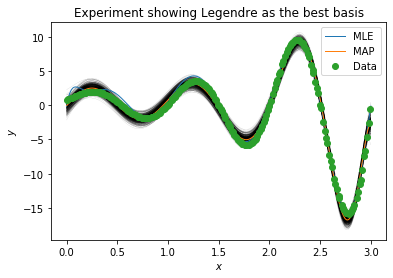

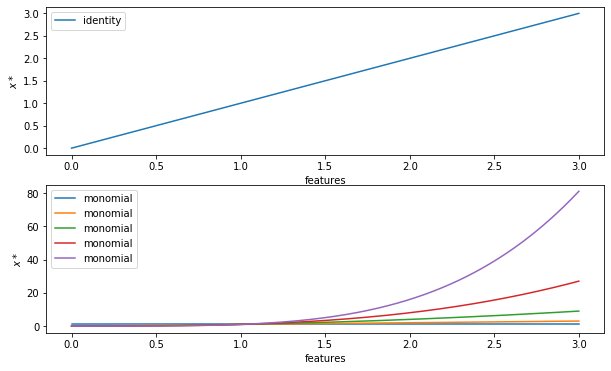

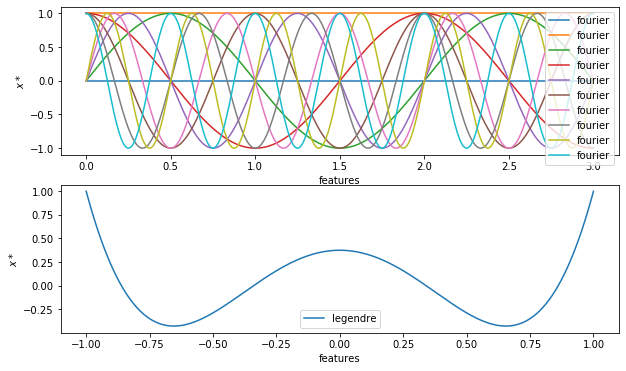

In [12]:
### Pre-thoughts: Of course one of the dangers here is overfitting. Given that the Fourier basis is composed
    # of sinusoids, I would expect it to do the best with approximation.

# Experiment:

from models import BayesianLinearRegression
from features import BayesianLinearRegressionFeatures
import numpy as np
import math
import matplotlib.pyplot as plt
from pyDOE import lhs
from scipy.stats import norm

N = 200 # N is the number of training points.
M = 11   # M is the number of parameters (a.k.a the length of w)
alpha = 5.0
beta = 0.1

# Create random input and output data // will probably need to use a function for normal dist here
X = lhs(1, N)*3
epsilon = norm.pdf(X, scale=0.5)
print("X shape: {}, epsilon shape: {}".format(X.shape, epsilon.shape))
y = np.exp(X) * np.sin(2 * np.pi * X) + epsilon

# Define models
blrf = BayesianLinearRegressionFeatures()
m = blrf.BuildLegendreFeaturedModel(X, y, M, (alpha, beta))

# Fit MLE and MAP estimates for w
w_MLE = m.fit_MLE()
w_MAP, Lambda_inv = m.fit_MAP()

# Predict at a set of test points
X_star = np.linspace(0,3,N)[:, None] # our x_star points will depend on the phi(x) function
Phi_star = blrf.FormatX_star(X_star, M)

print("X_star shape: {}, w_MLE shape: {}".format(X_star.shape, w_MLE.shape))
y_pred_MLE = np.matmul(Phi_star, w_MLE)
y_pred_MAP = np.matmul(Phi_star, w_MAP)

# Draw sampes from the predictive posterior
num_samples = 500
mean_star, var_star = m.predictive_distribution(Phi_star)
samples = np.random.multivariate_normal(mean_star.flatten(), var_star, num_samples)

# Plot
plt.title("Experiment showing Legendre as the best basis")
plt.figure(1, figsize=(10,6))
# plt.subplot(1,2,1)
for i in range(0, num_samples):
    plt.plot(X_star, samples[i,:], 'k', linewidth=0.05)
plt.plot(X_star, y_pred_MLE, linewidth=1.0, label = 'MLE')
plt.plot(X_star, y_pred_MAP, linewidth=1.0, label = 'MAP')
plt.plot(X,y,'o', label = 'Data')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')

# =======================
# =======================
# =======================

# Plotting features according to each basis for N=500, M=4

N = 500 # N is the number of training points.
M = 4   # M is the number of parameters (a.k.a the length of w)
alpha = 5.0
beta = 0.1
noise_var = 0.3

X = lhs(1, N)*3
epsilon = norm.pdf(X, scale=math.sqrt(0.5))
y = np.exp(X) * np.sin(2 * np.pi * X) + epsilon

# Predict at a set of test points
X_star = np.linspace(0,3,N)[:, None] # our x_star points will depend on the phi(x) function

# Define models
blrf = BayesianLinearRegressionFeatures()
m1 = blrf.BuildIdentityFeaturedModel(X, y, M, (alpha, beta))
Phi_star1 = blrf.FormatX_star(X_star, M)

m2 = blrf.BuildMonomialFeaturedModel(X, y, M, (alpha, beta))
Phi_star2 = blrf.FormatX_star(X_star, M)

m3 = blrf.BuildFourierFeaturedModel(X, y, M, (alpha, beta))
Phi_star3 = blrf.FormatX_star(X_star, M)

m4 = blrf.BuildLegendreFeaturedModel(X, y, M, (alpha, beta))
Phi_star4 = blrf.FormatX_star(X_star, M)

# Fit MLE and MAP estimates for w
w_MLE1 = m1.fit_MLE()
w_MAP, Lambda_inv = m1.fit_MAP()

print("X_star shape: {}, w_MLE shape: {}".format(X_star.shape, w_MLE.shape))
# y_pred_MLE = np.matmul(X_star, w_MLE)
# y_pred_MAP = np.matmul(X_star, w_MAP)

# Draw sampes from the predictive posterior
num_samples = 500
# mean_star, var_star = m.predictive_distribution(X_star)
# samples1 = np.random.multivariate_normal(mean_star1.flatten(), var_star1, num_samples)
# samples2 = np.random.multivariate_normal(mean_star2.flatten(), var_star2, num_samples)
# samples3 = np.random.multivariate_normal(mean_star3.flatten(), var_star3, num_samples)
# samples4 = np.random.multivariate_normal(mean_star4.flatten(), var_star4, num_samples)


plt.figure(2, figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(X_star, Phi_star1, label='identity')
plt.legend()
plt.ylabel('$x*$')
plt.xlabel('features')

plt.subplot(2,1,2)
plt.plot(X_star, Phi_star2, label='monomial')
plt.legend()
plt.ylabel('$x*$')
plt.xlabel('features')

plt.figure(3, figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(X_star, Phi_star3, label='fourier')
plt.legend()
plt.ylabel('$x*$')
plt.xlabel('features')

plt.subplot(2,1,2)
space = np.linspace(-1, 1, X_star.size)
basis = np.polynomial.Legendre.basis(4)
plt.plot(space, [basis(x_i) for x_i in space], label='legendre')
plt.legend()
plt.ylabel('$x*$')
plt.xlabel('features')

# for i in range(4):   
#     # Plot features
# #     plt.subplot(1,2,2)
# #     x_axis = np.linspace(-1, 1, N)[:,None]
# #     plotLegendre() # plot from -1 -> 1
#     plt.figure(i+2)
#     plt.plot(X_star, Phi_star1, label='features')
#     plt.plot(X_star, Phi_star2, label='features')
#     plt.plot(X_star, Phi_star3, label='features')
#     plt.plot(X_star, Phi_star4, label='features')
    
#     plt.legend()
#     plt.xlabel('$w$')
#     plt.ylabel('$p(w|D)$')
#     plt.axis('tight')

## Problem 2:


Consider a function of the type:

$y(x)=\sin(2 \pi x)+ \sin(6 \pi x)+ \sin(16 \pi x)+ \epsilon, \  \epsilon∼\mathcal{N}(0,0.1), x \in [0,2]$,

### a) Which feature type is more suitable for approximating the above function and why. (You do not have to prove anything, just provide a valid reasoning). 

Given that this is essentially a purely sinusoidal function/signal, I would expect this to be well approximated by a Fourier basis.


### b) What is the minimum number of features that is needed to accurately represent this function? (You do not have to prove anything, just provide a valid reasoning). 

I would say 33, as the 33rd feature would be $\sin(16 \pi x)$, and there would then be a feature to match each of the 3 sinusoidal terms in $y(x)$.


### c) Use the feature of your choice from the class that you have built and create a figure that contains: the data and the predictions corresponding to the MLE and MAP. For this experiment use $N=100$ and the number of features $M$ that you chose above.

X_star shape: (100, 1), w_MLE shape: (66, 1)


Text(0, 0.5, '$y*$')

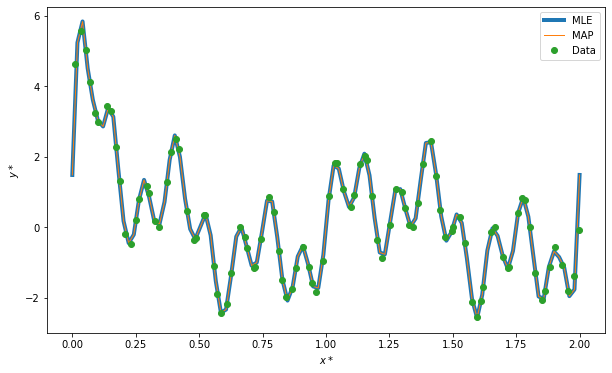

In [10]:
# Plotting features according to each basis for N=100, M=17 (I will input 32 because my implementation
    # adds an extra feature.)

N = 100 # N is the number of training points.
M = 32   # M is the number of parameters (a.k.a the length of w)
alpha = 5.0
beta = 0.1

# Create random input and output data // will probably need to use a function for normal dist here
X = lhs(1, N)*2
epsilon = norm.pdf(X, scale=(0.1))
y = np.sin(2 * np.pi * X) + np.sin(6 * np.pi * X) + np.sin(16 * np.pi * X) + epsilon

# Define models
blrf = BayesianLinearRegressionFeatures()
m = blrf.BuildFourierFeaturedModel(X, y, M, (alpha, beta))

# Fit MLE and MAP estimates for w
w_MLE = m.fit_MLE()
w_MAP, Lambda_inv = m.fit_MAP()

# Predict at a set of test points
X_star = np.linspace(0,2,N)[:, None]
Phi_star = blrf.FormatX_star(X_star, M)

print("X_star shape: {}, w_MLE shape: {}".format(X_star.shape, w_MLE.shape))
y_pred_MLE = np.matmul(Phi_star, w_MLE)
y_pred_MAP = np.matmul(Phi_star, w_MAP)

# Draw sampes from the predictive posterior
num_samples = M
mean_star, var_star = m.predictive_distribution(Phi_star)
samples = np.random.multivariate_normal(mean_star.flatten(), var_star, num_samples)

# # Plot
plt.figure(1, figsize=(10,6))
# for i in range(0, num_samples):
#     plt.plot(X_star, samples[i,:], 'k', linewidth=0.05)

plt.plot(X_star, y_pred_MLE, linewidth=4.0, label = 'MLE')
plt.plot(X_star, y_pred_MAP, linewidth=1.0, label = 'MAP')
plt.plot(X,y,'o', label = 'Data')
plt.legend()
plt.xlabel('$x*$')
plt.ylabel('$y*$')